In [1]:
%load_ext autoreload
%autoreload 2

## Physics Informed Neural Networks for Inverse Problems

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pinns_phase import Pinns, PinnLaterPhase

## Set up

In [3]:
kwargs = {
    "alpha_f" : 0.005,
    "h_f" : 5,
    "T_hot" : 4,
    "T0" : 1,
    "T_cold" : 1,
}

t0 = 0
tf = 1
n_int = 128
n_sb = 64
n_tb = 64

pinn = Pinns(n_int, n_sb, n_tb, t0, tf, **kwargs)

Charging


In [6]:
# Plot the input training points

input_sb_, output_sb_ = pinn.add_spatial_boundary_points()
input_tb_, output_tb_ = pinn.add_temporal_boundary_points()
input_int_, output_int_ = pinn.add_interior_points()
input_meas_, output_meas_ = pinn.get_measurement_data()

Charging


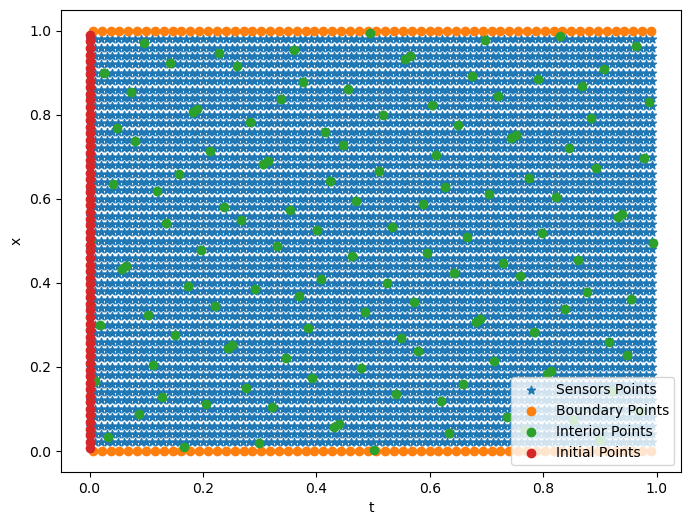

In [7]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(
    input_meas_[:, 0].detach().numpy(),
    input_meas_[:, 1].detach().numpy(), 
    label="Sensors Points", marker="*")
plt.scatter(
    input_sb_[:, 0].detach().numpy(),
    input_sb_[:, 1].detach().numpy(),
    label="Boundary Points")
plt.scatter(
    input_int_[:, 0].detach().numpy(),
    input_int_[:, 1].detach().numpy(),
    label="Interior Points")
plt.scatter(
    input_tb_[:, 0].detach().numpy(),
    input_tb_[:, 1].detach().numpy(),
    label="Initial Points")

plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

## Training

In [8]:
hist = pinn.fit(num_epochs=1, max_iter=1000, verbose=True)

################################  0  ################################
Total loss:  2.1901 | PDE Loss:  -1.1499 | Function Loss:  1.1899
Total loss:  2.1757 | PDE Loss:  -2.8198 | Function Loss:  1.1757
Total loss:  2.0614 | PDE Loss:  0.6415 | Function Loss:  1.0445
Total loss:  1.9594 | PDE Loss:  1.6885 | Function Loss:  0.6261
Total loss:  1.8799 | PDE Loss:  1.4697 | Function Loss:  0.666
Total loss:  1.7142 | PDE Loss:  -0.9997 | Function Loss:  0.7133
Total loss:  1.667 | PDE Loss:  -0.7991 | Function Loss:  0.6655
Total loss:  1.5574 | PDE Loss:  0.3677 | Function Loss:  0.5284
Total loss:  1.517 | PDE Loss:  -0.3718 | Function Loss:  0.5114
Total loss:  1.5059 | PDE Loss:  -0.1964 | Function Loss:  0.4972
Total loss:  1.4825 | PDE Loss:  0.9335 | Function Loss:  0.3383
Total loss:  1.4677 | PDE Loss:  0.637 | Function Loss:  0.3983
Total loss:  1.4514 | PDE Loss:  0.7088 | Function Loss:  0.3647
Total loss:  1.3811 | PDE Loss:  0.9294 | Function Loss:  0.1917
Total loss:  1.365

## Visualization

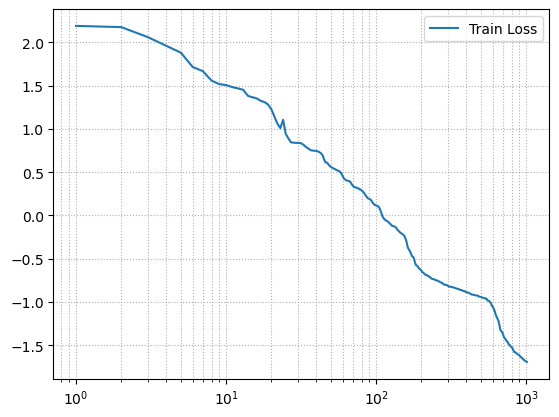

In [9]:
pinn.plot_loss_function(hist)

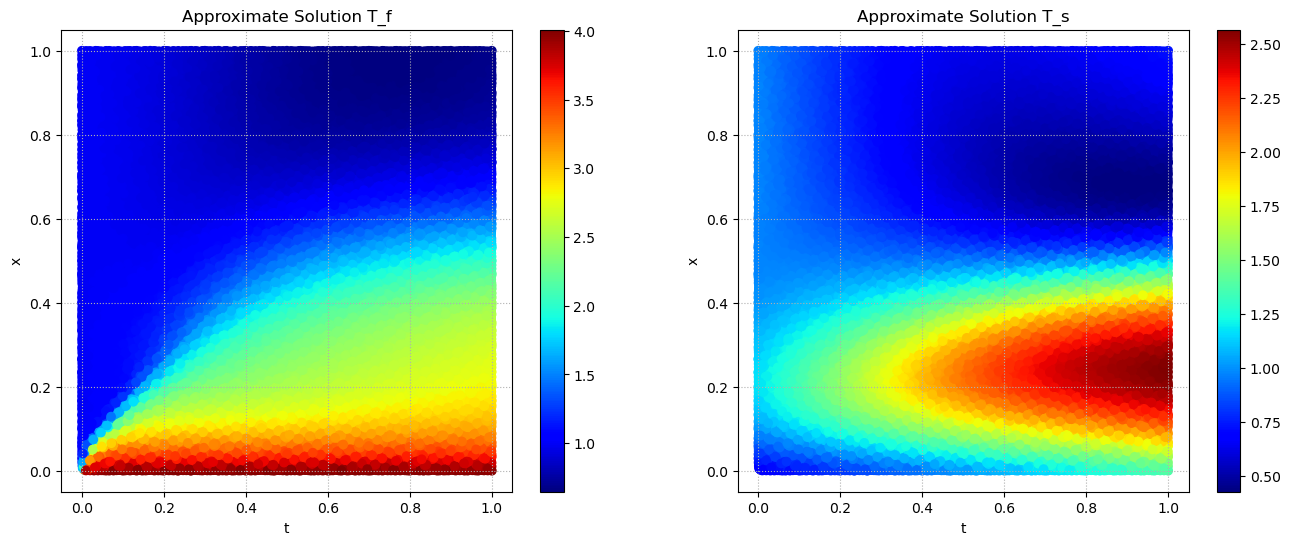

In [10]:
pinn.plot()

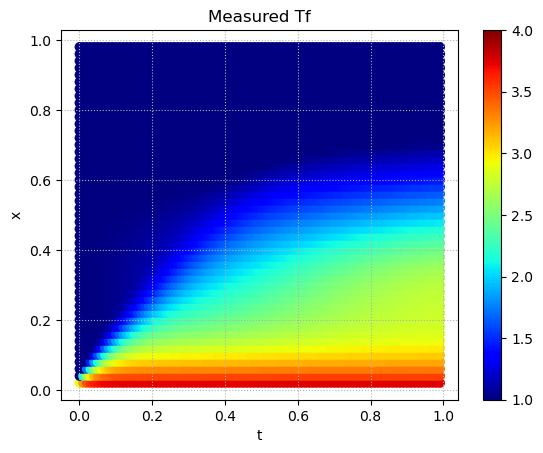

In [11]:
pinn.plot_reference()

# Second phase

In [12]:
t0 = 1
tf = 2

pinn_2 = PinnLaterPhase(n_int, n_sb, n_tb, t0, tf, pinn, **kwargs)

Idle


In [13]:
hist = pinn_2.fit(num_epochs=1, max_iter=1000, verbose=True)

################################  0  ################################
Total loss:  1.882 | PDE Loss:  -0.0106 | Function Loss:  0.8764
Total loss:  1.8683 | PDE Loss:  0.122 | Function Loss:  0.8604
Total loss:  1.7613 | PDE Loss:  0.8419 | Function Loss:  0.7056
Total loss:  1.6469 | PDE Loss:  1.3929 | Function Loss:  0.293
Total loss:  1.5579 | PDE Loss:  1.2114 | Function Loss:  0.2981
Total loss:  1.3981 | PDE Loss:  0.4199 | Function Loss:  0.3498
Total loss:  1.2693 | PDE Loss:  -0.8779 | Function Loss:  0.2662
Total loss:  1.2574 | PDE Loss:  -0.2427 | Function Loss:  0.2435
Total loss:  1.2065 | PDE Loss:  -1.3412 | Function Loss:  0.2053
Total loss:  1.2048 | PDE Loss:  -1.89 | Function Loss:  0.2045
Total loss:  1.2035 | PDE Loss:  -1.9771 | Function Loss:  0.2033
Total loss:  1.2003 | PDE Loss:  -1.5165 | Function Loss:  0.1995
Total loss:  1.1936 | PDE Loss:  -0.9194 | Function Loss:  0.1903
Total loss:  1.1828 | PDE Loss:  -0.4387 | Function Loss:  0.1723
Total loss:  1.1

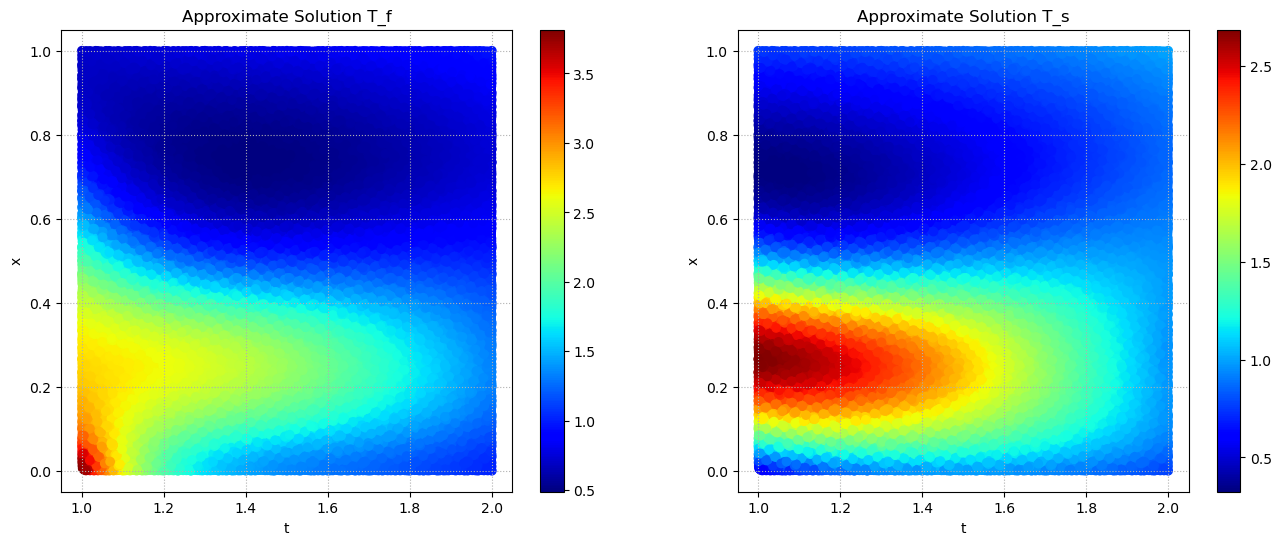

In [14]:
pinn_2.plot()

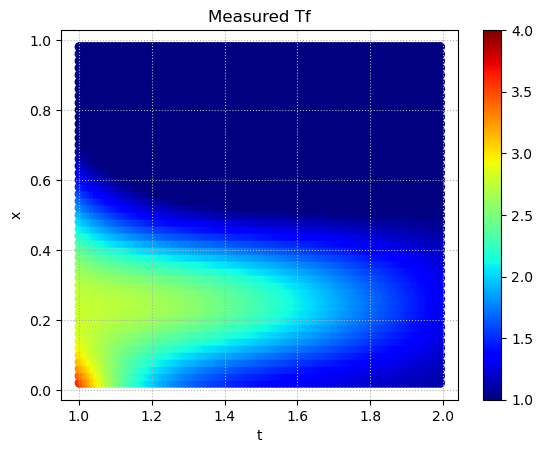

In [15]:
pinn_2.plot_reference()

In [16]:
t0 = 2
tf = 3

pinn_3 = PinnLaterPhase(n_int, n_sb, n_tb, t0, tf, pinn_2, **kwargs)

Discharging


In [21]:
hist = pinn_3.fit(num_epochs=1, max_iter=1000, verbose=True)

################################  0  ################################


Total loss:  1.5647 | PDE Loss:  0.027 | Function Loss:  0.552
Total loss:  1.5419 | PDE Loss:  0.1405 | Function Loss:  0.5243
Total loss:  1.3631 | PDE Loss:  0.79 | Function Loss:  0.2281
Total loss:  1.2845 | PDE Loss:  1.246 | Function Loss:  -0.7873
Total loss:  1.1214 | PDE Loss:  1.0458 | Function Loss:  -0.6755
Total loss:  0.9613 | PDE Loss:  -0.8495 | Function Loss:  -0.0454
Total loss:  0.6638 | PDE Loss:  -2.2836 | Function Loss:  -0.3367
Total loss:  1.7716 | PDE Loss:  1.0783 | Function Loss:  0.6733
Total loss:  0.2977 | PDE Loss:  -0.4431 | Function Loss:  -0.7894
Total loss:  0.4881 | PDE Loss:  0.0818 | Function Loss:  -0.7283
Total loss:  0.2308 | PDE Loss:  -1.6904 | Function Loss:  -0.7745
Total loss:  0.2535 | PDE Loss:  -1.6249 | Function Loss:  -0.7523
Total loss:  0.205 | PDE Loss:  -2.5976 | Function Loss:  -0.7957
Total loss:  0.2049 | PDE Loss:  -2.6362 | Function Loss:  -0.7957
Total loss:  0.2046 | PDE Loss:  -2.6629 | Function Loss:  -0.796
Total loss:  

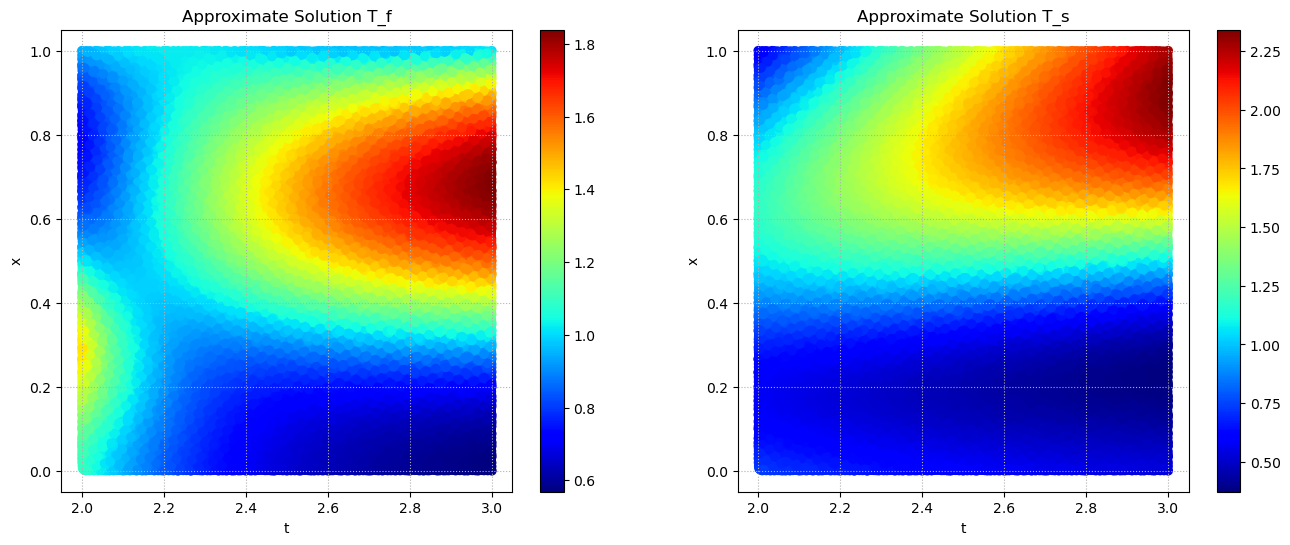

In [19]:
pinn_3.plot()

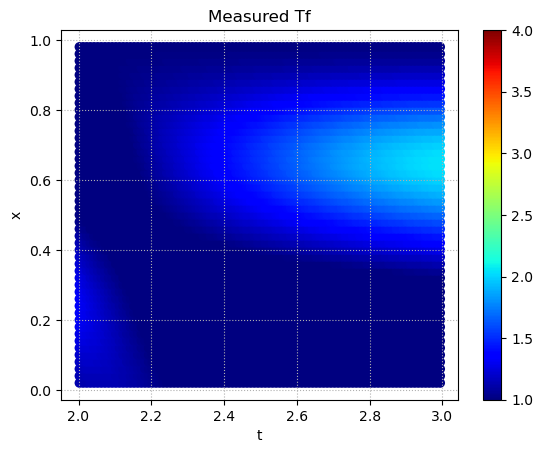

In [20]:
pinn_3.plot_reference()